In [122]:
# class Regression:
#     def __init__(self, coef):
#         self.coef = coef
            
#     def train(self, X, y):
#         X = np.matrix([np.ones(X.shape), X]).T
#         w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# #selection de la première colonne du dataset (loyer)
# Y = df_train.iloc[0:len(df_train),0]
# #selection de deuxième colonnes du dataset (surface)
# X = df_train.iloc[0:len(df_train),1]
# plt.axes().grid()
# plt.scatter(Y,X)
# plt.show()
# #linregress() renvoie plusieurs variables de retour
# #particulierement au slope et intercept
# slope, intercept, r_value, p_value, std_err = stats.linregress(Y, X)

# print(stats.linregress(Y, X))

# def predict(y):
#     #print(y)
#     return slope * y + intercept

# plt.axes().grid()
# plt.plot(Y, predict(Y), c='r')
# plt.scatter(Y, X)
# print(predict(1))

In [208]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [213]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')

In [214]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [215]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [216]:
print("Shape of train data:", df_train.shape)
print("Shape of test data:", df_test.shape)

Shape of train data: (1460, 81)
Shape of test data: (1459, 80)


# Making a copy of training data

In [218]:
train_copy = df_train.copy()
test_copy = df_test.copy()

In [219]:
num_cols = df_train._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Count:  38


# Drawing box plots to check for outliers

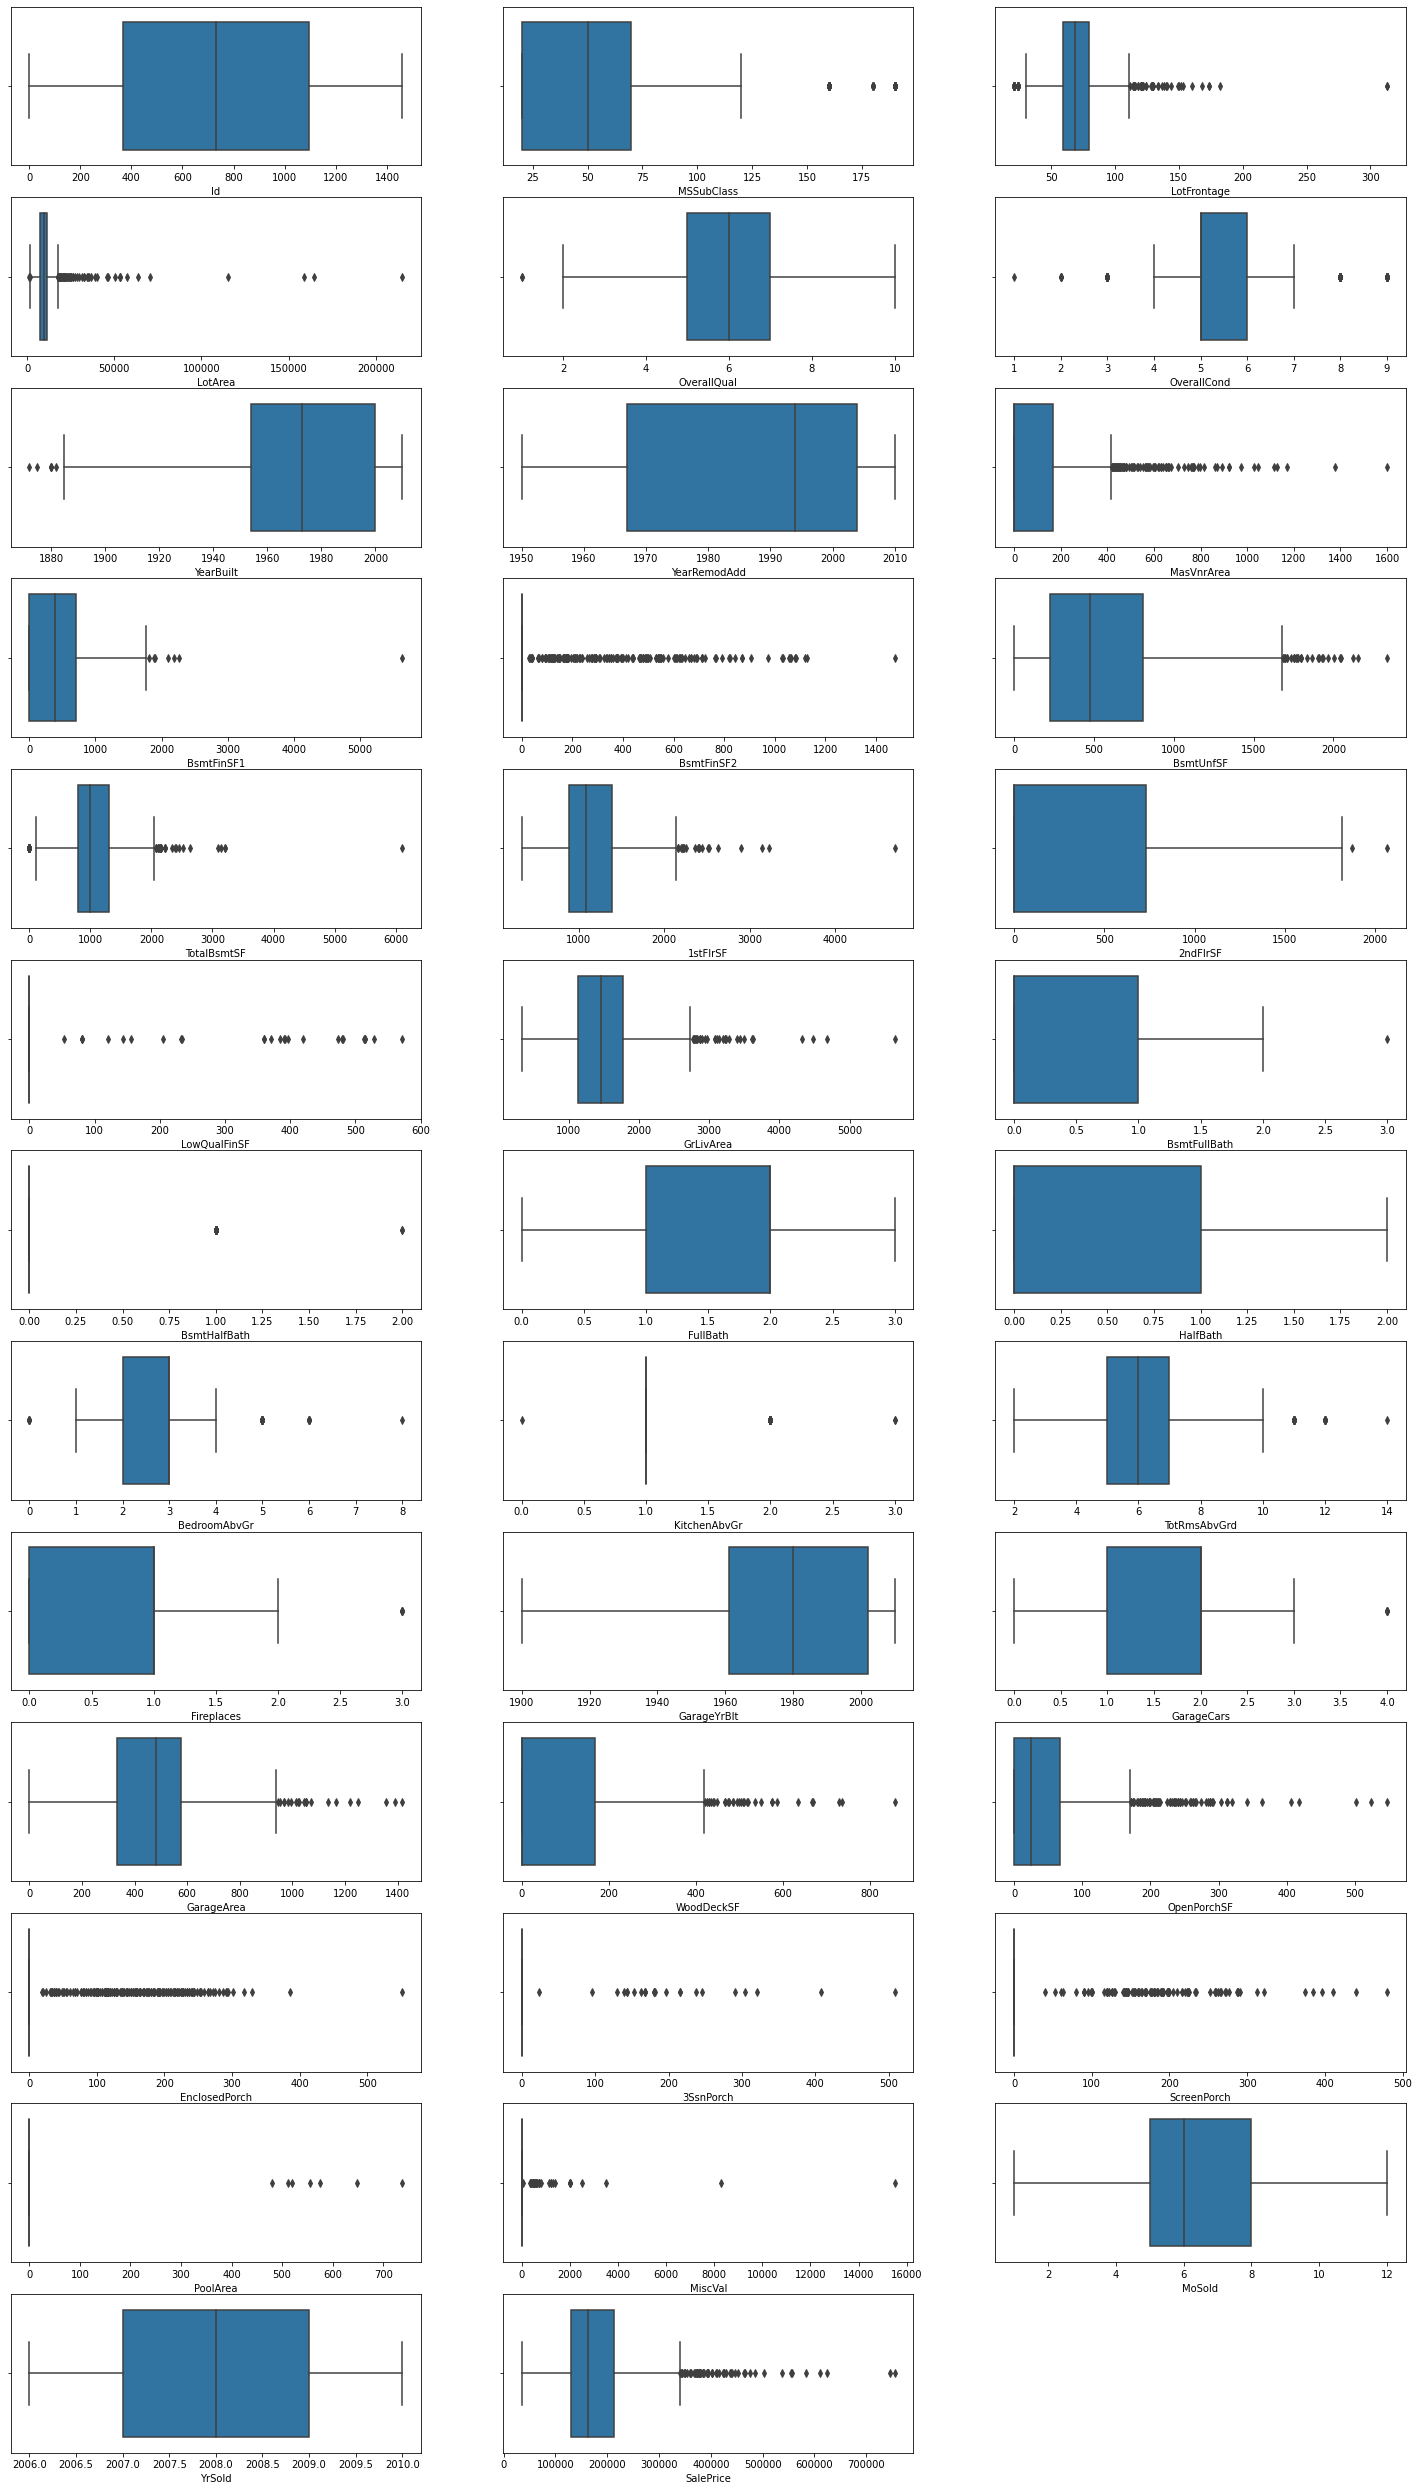

In [220]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
  plt.subplot(13,3,i[0]+1)
  sns.boxplot(df_train[i[1]])
  plt.xlabel(i[1])

# Index's to be removed from train set

In [221]:
index = [712, 1219, 1416, 1200, 1345, 1458, 773, 1248, 1423, 628, 973, 1458, 1459]
train = df_train.drop(labels = index, axis = 0)

print("Shape of train data:", train.shape)
print("Shape of test data:", df_test.shape)

Shape of train data: (1448, 81)
Shape of test data: (1459, 80)


## Print colum with null values 

In [223]:
Null_train = train.isnull().sum()
Null_train[Null_train > 0]

LotFrontage      258
Alley           1358
MasVnrType         7
MasVnrArea         7
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      682
GarageType        80
GarageYrBlt       80
GarageFinish      80
GarageQual        80
GarageCond        80
PoolQC          1442
Fence           1168
MiscFeature     1395
dtype: int64

## Creating a list of columns to be removed and removing from train and test sets, assuming the columns with highest number
## of missing values are likely to be in Test set

In [225]:
drop_columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id']
train = df_train.drop(drop_columns, axis =1)
test = df_test.drop(drop_columns, axis = 1)

print("Shape of train data:", train.shape)
print("Shape of test data:", test.shape)

Shape of train data: (1460, 76)
Shape of test data: (1459, 75)


# Analysing the null data in training set


In [226]:
Null_train_data = df_train[['LotFrontage', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
      'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

# Creating a function with name 'analysis' for extracting data type, unique and null count


In [227]:
def analysis(data):
    return pd.DataFrame({"Data Type":data.dtypes, "Unique Count":data.apply(lambda x: x.nunique(),axis=0), 
                         "Null Count": data.isnull().sum() })

In [228]:
analysis(Null_train_data)

,Data Type,Unique Count,Null Count
LotFrontage,float64,110,259
FireplaceQu,object,5,690
MasVnrType,object,4,8
MasVnrArea,float64,327,8
BsmtQual,object,4,37
BsmtCond,object,4,37
BsmtExposure,object,4,38
BsmtFinType1,object,6,37
BsmtFinType2,object,6,38
Electrical,object,5,1


In [229]:
Null_train_data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


# Replacing numeric null vlaues for training set

In [231]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna((df_train['LotFrontage'].mean()))
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna((df_train['MasVnrArea'].mode()[0]))
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna((df_train['GarageYrBlt'].mode()[0]))

In [232]:
Null_test = df_test.isnull().sum()
Null_test[Null_test > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [233]:
Null_test_data = test[['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
                         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 
                         'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCars','GarageArea', 
                         'GarageQual', 'GarageCond', 'SaleType']]
analysis(Null_test_data)

,Data Type,Unique Count,Null Count
MSZoning,object,5,4
LotFrontage,float64,115,227
Utilities,object,1,2
Exterior1st,object,13,1
Exterior2nd,object,15,1
MasVnrType,object,4,16
MasVnrArea,float64,303,15
BsmtQual,object,4,44
BsmtCond,object,4,45
BsmtExposure,object,4,44


In [234]:
Null_test_data[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


# Replacing numeric Null vlaues for testing set

In [235]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

# Data Cleaning

In [236]:
def correlation(data, limit):
  col = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix)):
    for j in range(i):
      if (corr_matrix.iloc[i, j]) > limit:
        col_name = corr_matrix.columns[i]
        col.add(col_name)
  return col

In [237]:
corr_columns = correlation(train, 0.7)
corr_columns

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

Dropping MiscFeature and MiscVal as their contribution towards the sale values doesnt seem much

In [238]:
train = df_train.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis = 1)
test = df_test.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis = 1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Separating target variable 

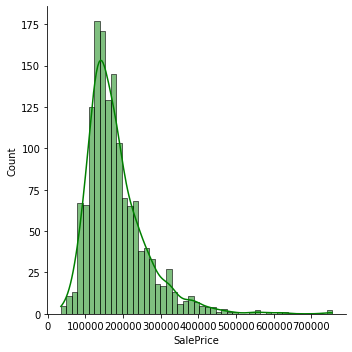

In [239]:
House_Price = pd.DataFrame(train['SalePrice'])
train = train.drop(['SalePrice'], axis = 1)

sns.displot(House_Price['SalePrice'], kde = True, color = 'Green')

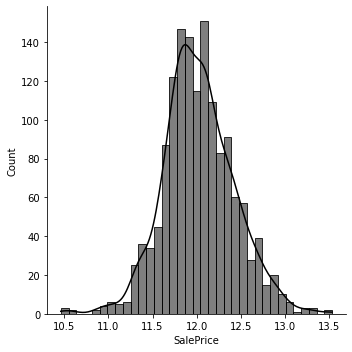

In [240]:
sns.displot(np.log(House_Price['SalePrice']), kde = True, color = 'Black')

# Applying log on target variable

In [241]:
House_Price = pd.DataFrame(np.log(House_Price['SalePrice']))

print("Shape of train data:", train.shape)
print("Shape of test data:", test.shape)

Shape of train data: (1460, 77)
Shape of test data: (1459, 77)


In [242]:
data = pd.concat([train, test])
data.shape

(2919, 77)

# Generating new columns

In [243]:
#data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['YrBltRemod'] = data['YearBuilt'] + data['YearRemodAdd']
data['TotalBathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
data['TotalPorchSf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

#data["LivLotRatio"] = data['GrLivArea']/data['LotArea']

data["TotalOutsideSF"] = sum((data['WoodDeckSF'],data['OpenPorchSF'],data['EnclosedPorch'], data['ScreenPorch']))

data['HouseAge'] = data['YrSold'] - data['YearBuilt']

data['OverallCondQual'] = (data['OverallCond'] + data['OverallQual'])/2

In [244]:
data_num_cols = data._get_numeric_data().columns 
data_num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YrBltRemod',
       'TotalBathrooms', 'TotalPorchSf', 'TotalOutsideSF', 'HouseAge',
       'OverallCondQual'],
      dtype='object')

In [245]:
data_cat_cols = data.columns.difference(data_num_cols)
data_cat_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

# Separating both numeric and categorical data from set

In [246]:
data_num_data = data.loc[:, data_num_cols]
data_cat_data = data.loc[:, data_cat_cols]

print("Shape of num data:", data_num_data.shape)
print("Shape of cat data:", data_cat_data.shape)

Shape of num data: (2919, 40)
Shape of cat data: (2919, 43)


# Scaling numeric variables 

In [202]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [247]:
s_scaler = StandardScaler()
data_num_data_s = s_scaler.fit_transform(data_num_data)

data_num_data_s = pd.DataFrame(data_num_data_s, columns = data_num_cols)

## Scaling categorical variables 

In [248]:
data_cat_data = data_cat_data.fillna('NA')

label = LabelEncoder()
data_cat_data = data_cat_data.astype(str).apply(LabelEncoder().fit_transform)

In [249]:
data_num_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage        0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
YrBltRemod         0
TotalBathrooms     0
TotalPorchSf       0
TotalOutsideSF     0
HouseAge           0
OverallCondQual    0
dtype: int64

In [250]:
data_num_data_s.reset_index(drop=True, inplace=True)
data_cat_data.reset_index(drop=True, inplace=True)

data_new = pd.concat([data_num_data_s, data_cat_data], axis = 1)

train_new = data_new.loc[:1447,]
test_new = data_new.loc[1448:,]

print("Shape of train data:", train_new.shape)
print("Shape of test data:", test_new.shape)

Shape of train data: (1448, 83)
Shape of test data: (1471, 83)


# Spliting data

In [251]:
from sklearn.model_selection import train_test_split 

trainx,valx,trainy,valy = train_test_split(train_new,House_Price,test_size=0.2,random_state=1234)
#print(cust_data.shape)
print(trainx.shape)
print(valx.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1448, 1460]

In [69]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train['Condition1'].values.reshape(-1,1))
cond_enc_train = enc.transform(df_train['Condition1'].values.reshape(-1,1)).toarray()

cond_enc_train.shape

(1460, 9)

In [70]:
df_train_cond = pd.DataFrame(cond_enc_train)
df_train_cond.columns = ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']

df_train_cond

,Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
for col_name in df_train_cond.columns :
    df_train[col_name] = df_train_cond[col_name]

In [74]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SalePrice,Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,208500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,181500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,223500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,140000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,175000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,210000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,266500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,142125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
columns_iteration = ['LotArea', 'GarageArea', '1stFlrSF', 
            '2ndFlrSF', 'Artery', 'Feedr', 'Norm', 'RRNn', 
            'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe', 'SalePrice']

In [76]:
y = df_train['YrSold']

df_train = df_train[columns_iteration]

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df_train, y)

KNeighborsClassifier()

In [78]:
df_train

,LotArea,GarageArea,1stFlrSF,2ndFlrSF,Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe,SalePrice
0,8450,548,856,854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,9600,460,1262,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181500
2,11250,608,920,866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,9550,642,961,756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,14260,836,1145,1053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,460,953,694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,13175,500,2073,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,9042,252,1188,1152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,9717,240,1078,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


# Phase de prédilection

In [80]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median') #most_frequent
imp.fit(y.values.reshape(-1,1))

SimpleImputer(strategy='median')

In [81]:
yrs_imp_test = imp.transform(df_test['YrSold'].values.reshape(-1,1))
df_test['YrSold'] = yrs_imp_test[0:,0]

In [82]:
if df_test['YrSold'].isna().sum() == 0:
    print("test ok plus de NaN")

test ok plus de NaN


In [83]:
y_pred_train = neigh.predict(df_train)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y.values, y_pred_train)

0.4726027397260274